<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/Practica_19_AL263158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Práctica #19: Ejercicios con EDA 2
* **Matricula** AL263158
* Programación para analítica descriptiva y predictiva

#####Descripción del conjunto de datos:


Utiliza el conjunto de datos "Haberman's Survival" disponible en el siguiente 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"'. Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.



In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


####Descripción de los datos.

In [109]:

print("Dimensiones:", df.shape)
print("CSV Original")
print(df.head())

conteo_v=df.count()
print("\nConteo de valores")
print(conteo_v)


print("\nTipos de datos")
print(df.dtypes)

print("\nValores únicos")
print(df.nunique())

print("\nCambio de tipos de datos variable status de int64 a category")
df['status'] = df['status'].astype('category')
print(df.dtypes)

print("\nValores duplicados")
print(df.duplicated().sum())

print("Duplicados")
#print(df[df.duplicated(keep=False)])
print(df[df.duplicated()])

print("\nValores faltantes")
print(df.isnull().sum())

print("\nDescripcion del dataset")
print(df.describe())

Dimensiones: (306, 4)
CSV Original
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1

Conteo de valores
age       306
year      306
nodes     306
status    306
dtype: int64

Tipos de datos
age       int64
year      int64
nodes     int64
status    int64
dtype: object

Valores únicos
age       49
year      12
nodes     31
status     2
dtype: int64

Cambio de tipos de datos variable status de int64 a category
age          int64
year         int64
nodes        int64
status    category
dtype: object

Valores duplicados
17
Duplicados
     age  year  nodes status
23    37    63      0      1
27    38    60      0      1
52    41    65      0      1
65    43    64      0      2
78    44    61      0      1
108   48    58     11      2
132   50    61      0      1
179   54    62      0      1
184   55    58      1      1
196   56    60      0      1
206   57    64      0      1


* **Valores faltantes:** Ninguno
* **Registros duplicados:** 17 sin embargo no pueden considerarse como duplicados posible que varios pacientes que fueron operados el mismo año (year), en el momento del estudio tuvieran la misma edad(age), mismo estado (Status) de supervivencia y tener la misma cantidad de nodos axilares (nodes).

####Histogramas para las columnas numéricas.

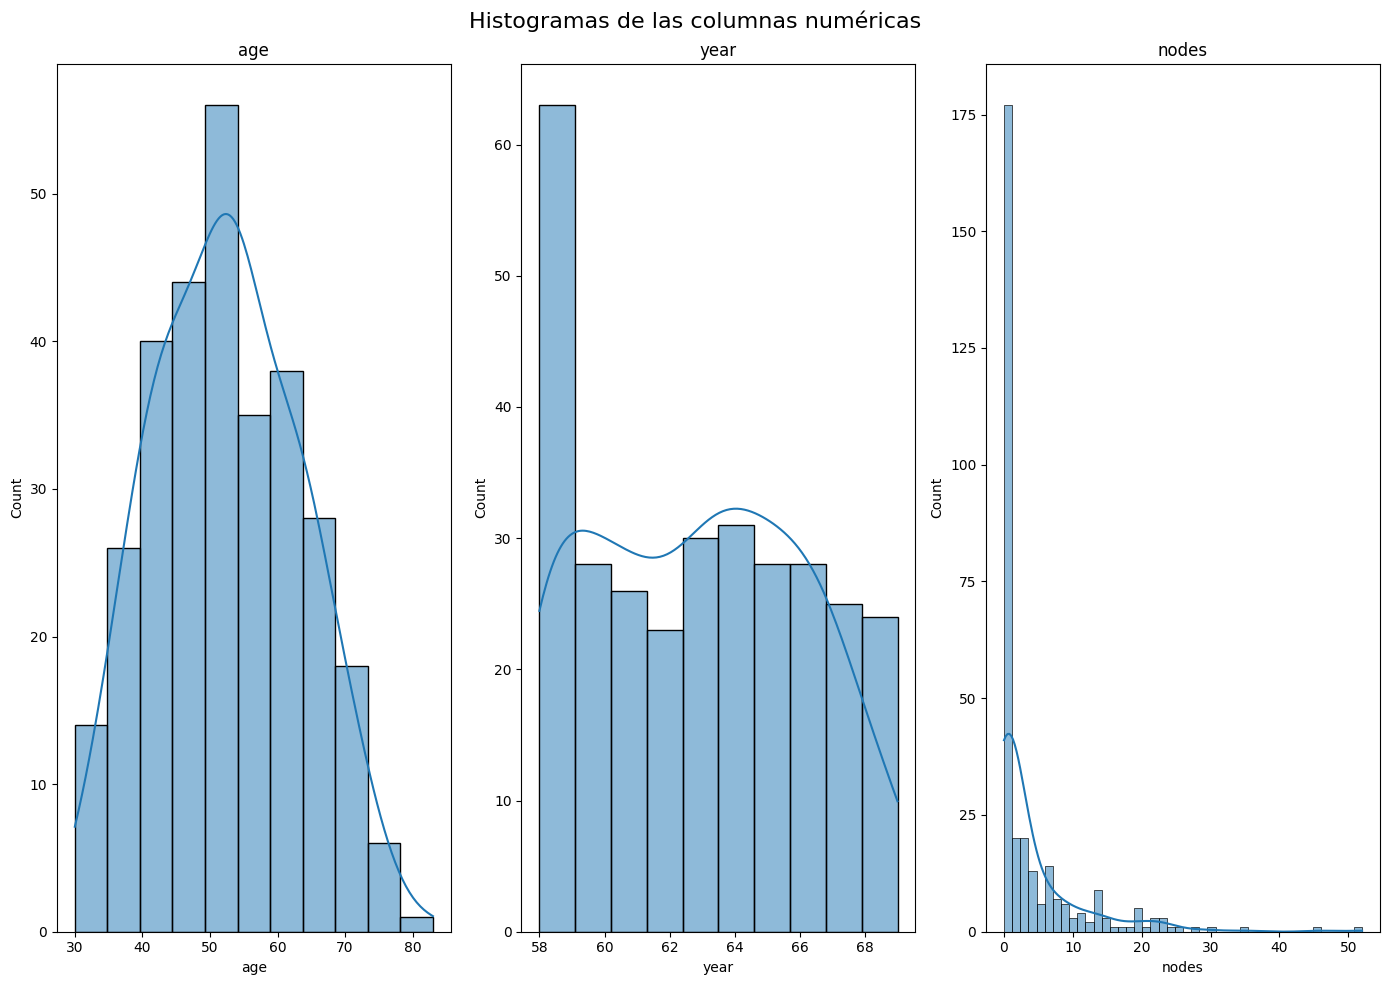

In [110]:
plt.figure(figsize=(14, 10))
plt.suptitle('Histogramas de las columnas numéricas', fontsize=16)
columnas_numericas = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


####Gráficas de barras para la columna categórica status (supervivencia).

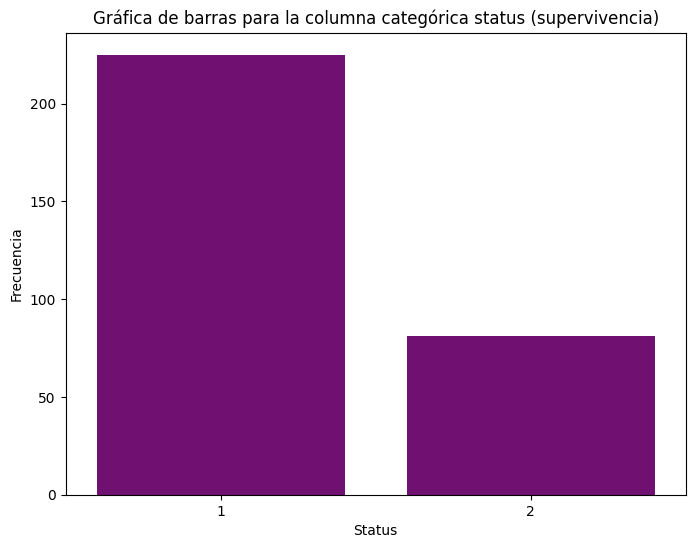

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status', color='purple')
plt.title('Gráfica de barras para la columna categórica status (supervivencia)')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.show()

####Boxplots para identificar outliers en las columnas numéricas.

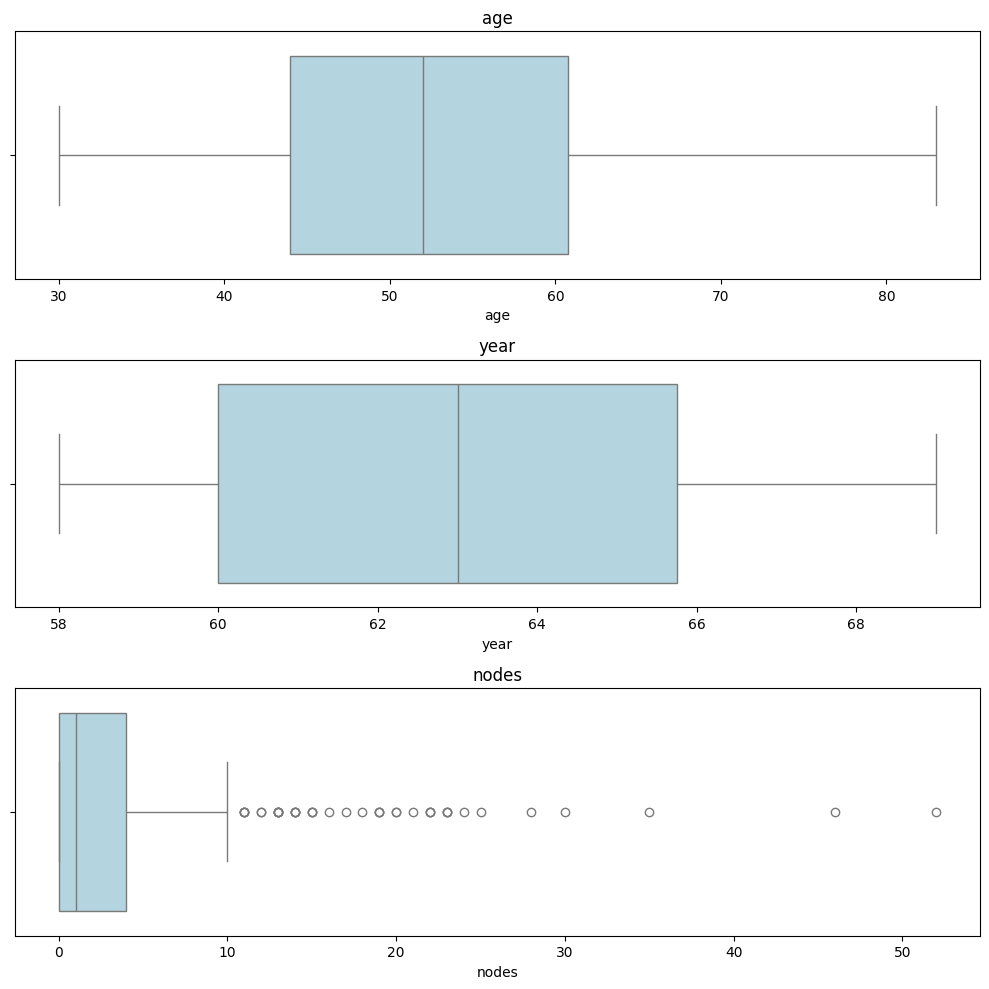

In [113]:
plt.figure(figsize=(10, 10))
columnas_numericas = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(columnas_numericas):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

En las graficas se puede apreciar como la variable que presenta anomalias es Nodes. Sin embargo se consideran datos reales ya que cada paciente puede contar con una cantidad distinta dependiendo del avance de la enfemedad, una mayor cantidad de nodos axilares podria indicar un estado mas avanzado o agresivo dde la enfermedad.

####Matriz de correlación y mapa de calor.

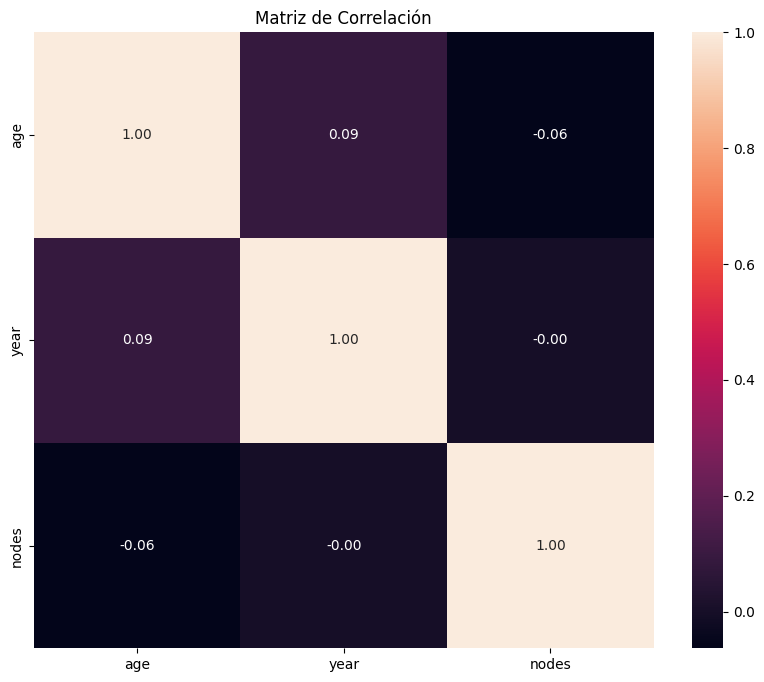

In [114]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

#mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
print("\n")


####Pairplot para visualizar relaciones entre variables numéricas.

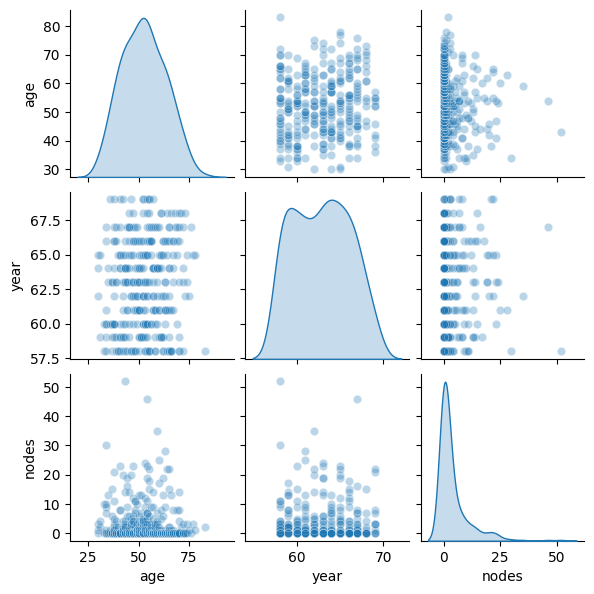

In [115]:
#pairplot
sns.pairplot(numeric_df, plot_kws={'alpha': 0.3}, diag_kind='kde', height=2)
plt.show()

De acuerdo a la matriz de correlacion,  ninguna de las 3 variables muestra un correlacion notoriamente fuerte hacia cualquier otra, ya que tanto positiva como negativamente, cualquier valor es demasiado proximo a 0 para ser considerada una relación significativa. Ademas los pair plot no muestran un patron importante ademas del hecho de que el estudio fue realizado en un grupo de paciente con un amplio rango de edades, y cirugias realizadas en diferentes años. Sin embargo tambien es posible observar que la mayoria de los pacientes presenta entre 0 y 10 nodos axilares, con algunas anomalias donde exeden los 50 nodos.

###Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

####Shapiro-Wilk

In [118]:
print("\nPruebas de normalidad (Shapiro-Wilk)")

from scipy.stats import shapiro
numeric_columns = df.select_dtypes(include=[np.number]).columns
shapiro_results = []
for col in numeric_columns:
    statistic, pvalue = shapiro(df[col])
    shapiro_results.append({'Variable': col, 'Statistic': statistic, 'P-value': pvalue})
shapiro_df = pd.DataFrame(shapiro_results)
display(shapiro_df)


Pruebas de normalidad (Shapiro-Wilk)


,Variable,Statistic,P-value
0,age,0.989458,2.604660e-02
1,year,0.946791,4.568916e-09
2,nodes,0.615308,1.320476e-25


El test Shapiro-wilk muestra que a pesar de que lvalor statistic de la variable de edad y año son cercanos a 1 y pudieramos considerar que son "normales", al observar los valores de pvalue los valores estan muy por debajo del 0.05, por lo que podemos concluir que no es una distrbucion normal.

####Anderson-Darling

In [120]:
from scipy.stats import anderson
numeric_columns = df.select_dtypes(include=[np.number]).columns
anderson_results = []
for col in numeric_columns:
    result = anderson(df[col])
    anderson_results.append({'Variable': col, 'Statistic': result.statistic, 'Critical Values': result.critical_values})
anderson_df = pd.DataFrame(anderson_results)
display(anderson_df)

,Variable,Statistic,Critical Values
0,age,0.731561,"[0.569, 0.648, 0.777, 0.906, 1.078]"
1,year,4.313737,"[0.569, 0.648, 0.777, 0.906, 1.078]"
2,nodes,39.686615,"[0.569, 0.648, 0.777, 0.906, 1.078]"


En el caso de Anderson-Darling la edad se encuentras por debajo del 5% lo que podria interpretarse como "podria ser normal", sin embargo tanto nodes como año se encuentran por encima, lo que significa que estas no pueden considerarse como normales o que pudieran serlo.

####Kolmogorov-Smirnov

In [139]:
from scipy.stats import kstest
kresult=[]
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    stat = kstest(df[col], 'norm')
    kresult.append({'Variable': col, 'Statistic': stat.statistic, 'P-value': stat.pvalue, 'Sloc':stat.statistic_location, 'Sign': stat.statistic_sign})
kresult_df = pd.DataFrame(kresult)
display(kresult_df)

,Variable,Statistic,P-value,Sloc,Sign
0,age,1.0,0.000000e+00,30.0,-1
1,year,1.0,0.000000e+00,58.0,-1
2,nodes,0.5,2.897142e-71,0.0,-1


En el caso de kolmorog, las 3 variables tienen un pvalue que es 0 o lo suficientemente cerca como para serlo. Lo que significa que a pesar que en el caso nodes (0.5) se acerque a 0, no pueden considerarse una distribucion normal.

####QQplot

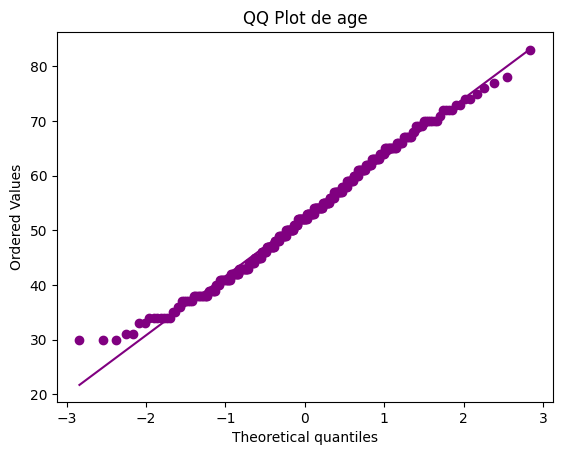

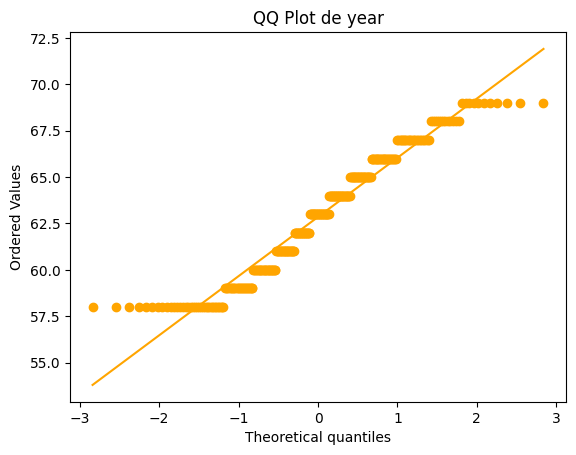

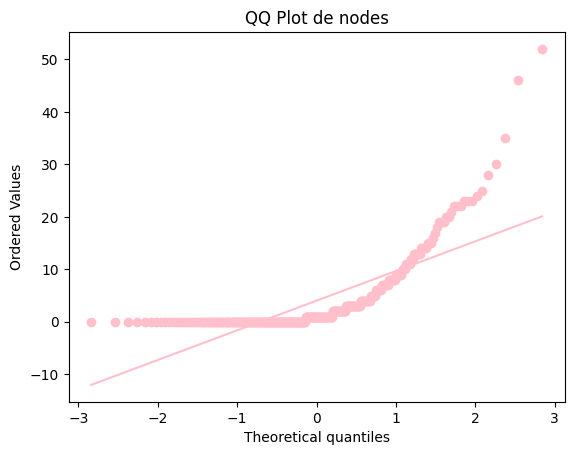

In [121]:
from scipy.stats import probplot
numeric_columns = df.select_dtypes(include=[np.number]).columns

colors = [ 'purple', 'orange','pink']

for i, col in enumerate(numeric_columns):
    plt.figure()
    probplot(df[col], dist='norm', plot=plt)
    plt.title(f'QQ Plot de {col}')

    ax = plt.gca()
    lines = ax.get_lines()
    for j, line in enumerate(lines):
        line.set_color(colors[i % len(colors)])
    plt.show()

Los qqplot reiteran lo que las pruebas de normalidad arrojan como resultado. Ninguna de las tres variables tiene una distribucion alienada con la linea "normal", a pesar de eso, la variable que mas se le acerca es la edad (age).

####Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda.

  El dataset esta compuesto de datos medicos que si bien es cierto, en la variable de nodos axilares (nodes) muestran sesgos anomales en pacientes con una cantidad mayor a 10 (y de acuerdo al pair plot incluso mayor que 50), no seria prudente realizat la imputacion de ningun tipo (mediana, media o moda) ya que podria influir negativamente en el modelo al asumir que estas situaciones no pueden ocurrir cuando en realidaad si.

###Transformacion logaritmica

Como se menciono anteriormente, al no utilizar imputacion es necesario utilizar otro metodo para intentar obtener una distribucion normal de los datos. Dado que el outliner se encuentra en la columna de Nodes se aplico una transformacion logaritmica para "aplanar" la curva de distribucion normal y obtener una distribucion mas adecuada, sin sacrificar los datos medicos iniciales.

Fuentes:


https://www.hpe.com/mx/es/what-is/data-transformation.html

https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

https://bookdown.org/keilor_rojas/CienciaDatos/transformaci%C3%B3n-estandarizaci%C3%B3n-e-imputaci%C3%B3n-de-datos.html



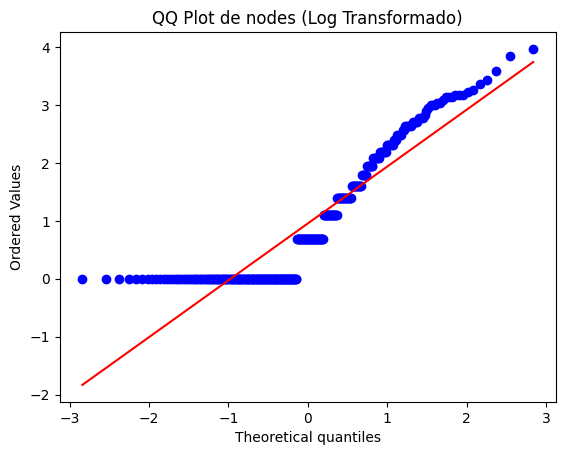

In [127]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
df['nodes'] = np.log1p(df['nodes'])
plt.figure()
probplot(df['nodes'], dist='norm', plot=plt)
plt.title('QQ Plot de nodes (Log Transformado)')
plt.show()

###Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados

###Descripción de los datos.

In [144]:


print("\nValores únicos")
print(df.nunique())

print("\nCambio de tipos de datos variable status de int64 a category")
df['status'] = df['status'].astype('category')
print(df.dtypes)

print("\nValores duplicados")
print(df.duplicated().sum())

print("Duplicados")
#print(df[df.duplicated(keep=False)])
print(df[df.duplicated()])

print("\nValores faltantes")
print(df.isnull().sum())

print("\nDescripcion del dataset")
print(df.describe())


Valores únicos
age       49
year      12
nodes     31
status     2
dtype: int64

Cambio de tipos de datos variable status de int64 a category
age          int64
year         int64
nodes      float64
status    category
dtype: object

Valores duplicados
17
Duplicados
     age  year     nodes status
23    37    63  0.000000      1
27    38    60  0.000000      1
52    41    65  0.000000      1
65    43    64  0.000000      2
78    44    61  0.000000      1
108   48    58  2.484907      2
132   50    61  0.000000      1
179   54    62  0.000000      1
184   55    58  0.693147      1
196   56    60  0.000000      1
206   57    64  0.000000      1
233   61    59  0.000000      1
237   61    59  0.000000      1
243   62    66  0.000000      1
249   63    63  0.000000      1
266   65    64  0.000000      1
276   67    66  0.000000      1

Valores faltantes
age       0
year      0
nodes     0
status    0
dtype: int64

Descripcion del dataset
              age        year       nodes
count  306

####Histogramas para las columnas numéricas.

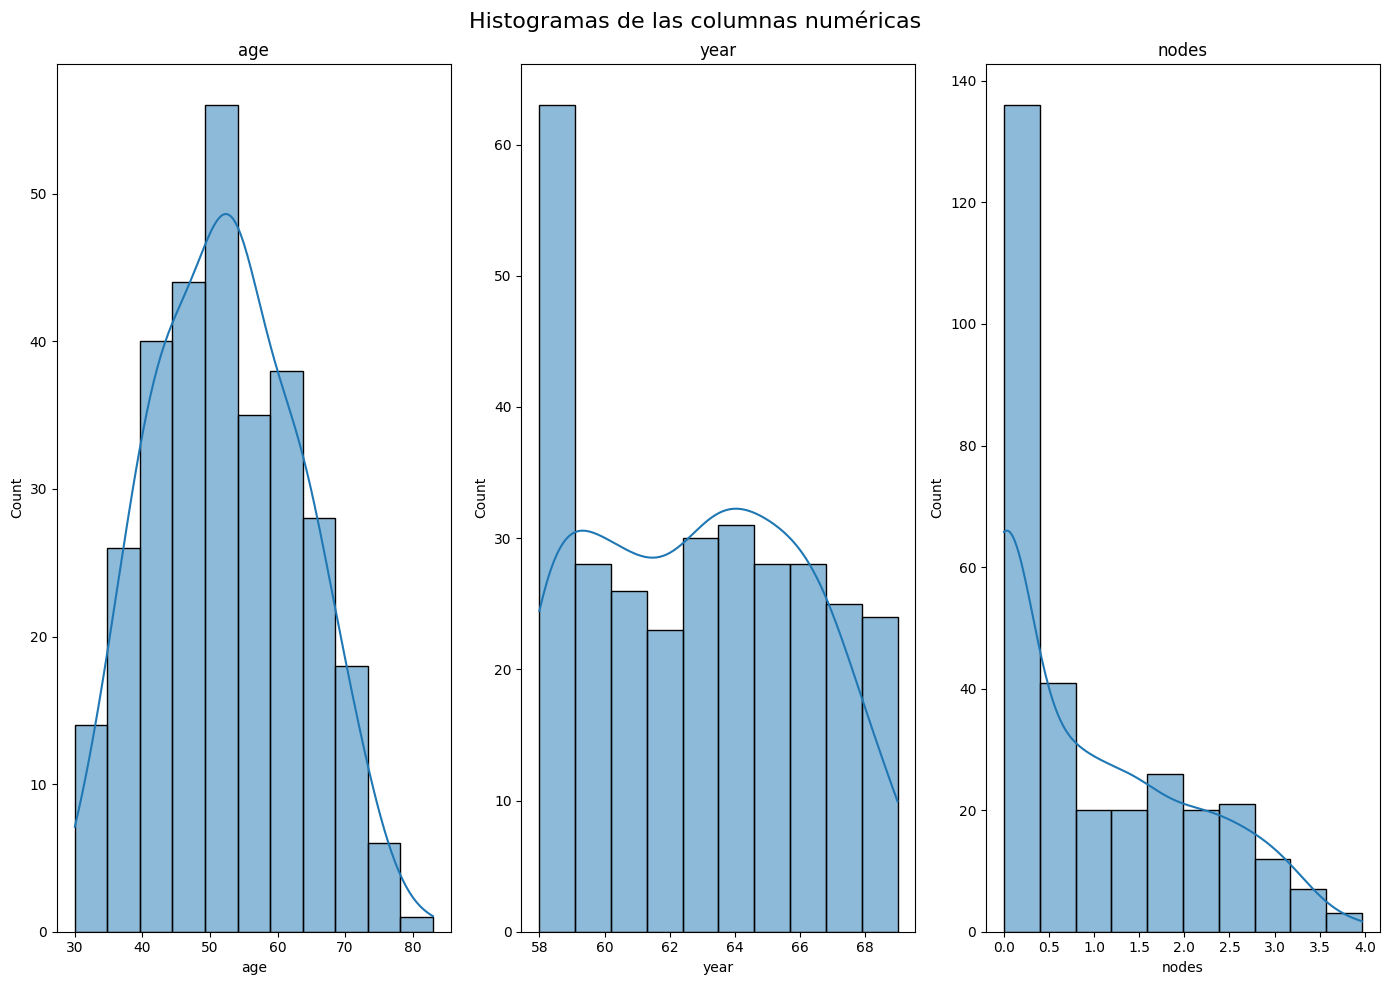

In [128]:
plt.figure(figsize=(14, 10))
plt.suptitle('Histogramas de las columnas numéricas', fontsize=16)
columnas_numericas = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


Se reduce el maximo del eje X para la columna afectada (Nodes)

####Gráficas de barras para la columna categórica status (supervivencia).

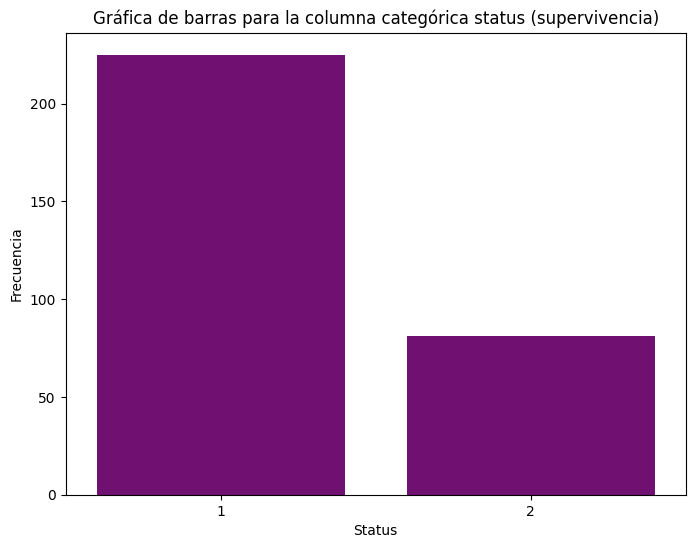

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status', color='purple')
plt.title('Gráfica de barras para la columna categórica status (supervivencia)')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.show()

La variable grafica no sufrio ningun cambio por lo que esta grafica se mantiene.

####Boxplots para identificar outliers en las columnas numéricas.

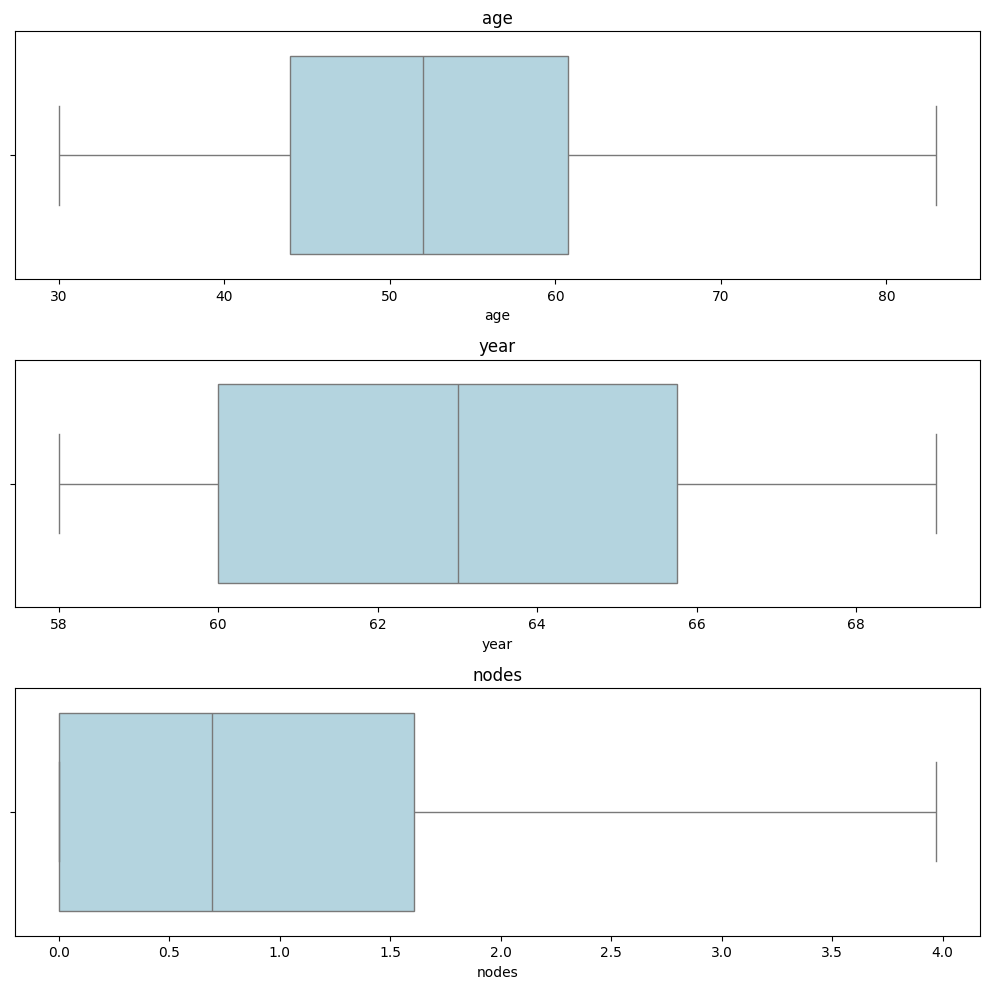

In [132]:
plt.figure(figsize=(10, 10))
columnas_numericas = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(columnas_numericas):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

El boxplot de nodes ya no muestra anomalias, demostrando que la transformacion logaritmica fue aplicada y funcion para ajustar la distribucion normal de los datos.

####Matriz de correlación y mapa de calor.

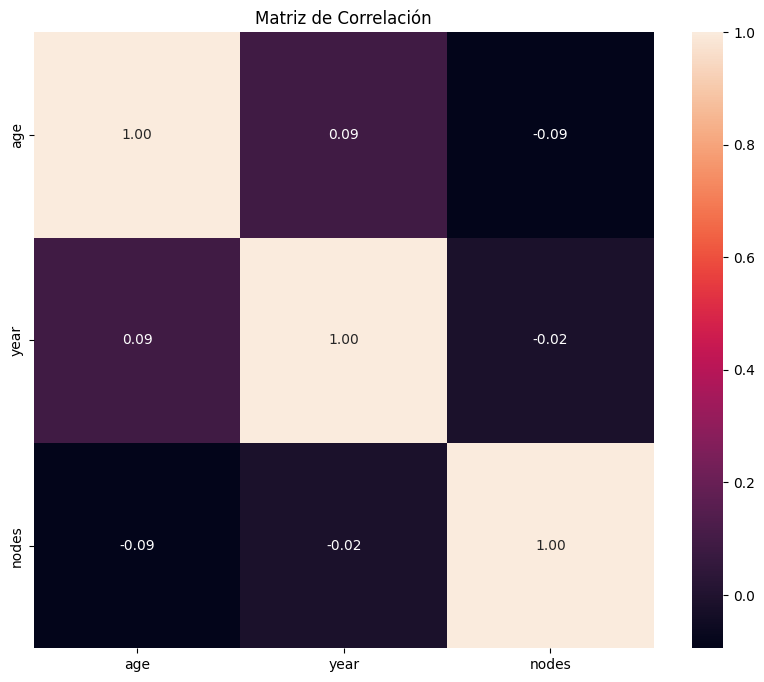

In [130]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

#mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
print("\n")


La correlacion de nodes con respecto a otras variables sufrio cambios importantes (de -0.6 a -0.9 y 0.0. a -0.02) pero aun no indica un patron de correlacion significativo pues sigue estando mas cerca del 0 que de 1.

####Pairplot para visualizar relaciones entre variables numéricas.

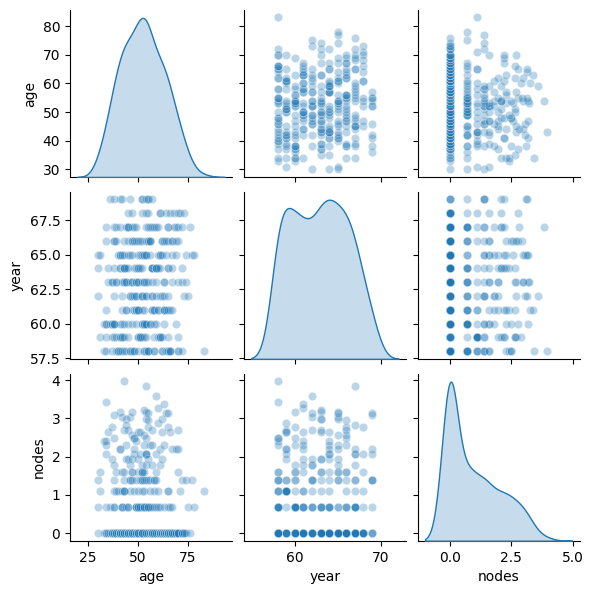

In [131]:
#pairplot
sns.pairplot(numeric_df, plot_kws={'alpha': 0.3}, diag_kind='kde', height=2)
plt.show()

El sesgo que mostraban las graficas referentes a nodes se redujo considerablemente, pero sigue sin mostrar un patron con respecto a las otras variables.

###Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

####Shapiro-Wilk

In [133]:
print("\nPruebas de normalidad (Shapiro-Wilk)")

from scipy.stats import shapiro
numeric_columns = df.select_dtypes(include=[np.number]).columns
shapiro_results = []
for col in numeric_columns:
    statistic, pvalue = shapiro(df[col])
    shapiro_results.append({'Variable': col, 'Statistic': statistic, 'P-value': pvalue})
shapiro_df = pd.DataFrame(shapiro_results)
display(shapiro_df)


Pruebas de normalidad (Shapiro-Wilk)


,Variable,Statistic,P-value
0,age,0.989458,2.604660e-02
1,year,0.946791,4.568916e-09
2,nodes,0.832041,1.496666e-17


A pesar de la transformacion de datos, el resultado del analisis de shapiro para la columna nodes no cambia ya que aun se refleja como anormal.

####Anderson-Darling

In [134]:
from scipy.stats import anderson
numeric_columns = df.select_dtypes(include=[np.number]).columns
anderson_results = []
for col in numeric_columns:
    result = anderson(df[col])
    anderson_results.append({'Variable': col, 'Statistic': result.statistic, 'Critical Values': result.critical_values})
anderson_df = pd.DataFrame(anderson_results)
display(anderson_df)

,Variable,Statistic,Critical Values
0,age,0.731561,"[0.569, 0.648, 0.777, 0.906, 1.078]"
1,year,4.313737,"[0.569, 0.648, 0.777, 0.906, 1.078]"
2,nodes,19.601319,"[0.569, 0.648, 0.777, 0.906, 1.078]"


En el caso de Anderson-Darling, si bien sigue estando fuera del rango que se considera "normal" el valor de stastic se redujo de 39 a 19.

####Kolmogorov-Smirnov

In [140]:
from scipy.stats import kstest
kresult=[]
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    stat = kstest(df[col], 'norm')
    kresult.append({'Variable': col, 'Statistic': stat.statistic, 'P-value': stat.pvalue, 'Sloc':stat.statistic_location, 'Sign': stat.statistic_sign})
kresult_df = pd.DataFrame(kresult)
display(kresult_df)

,Variable,Statistic,P-value,Sloc,Sign
0,age,1.0,0.000000e+00,30.0,-1
1,year,1.0,0.000000e+00,58.0,-1
2,nodes,0.5,2.897142e-71,0.0,-1


Los resultados de este analisis se mantienen iguales.

####QQplot

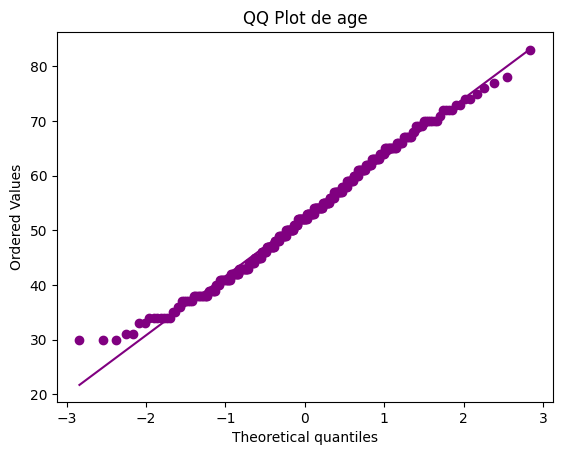

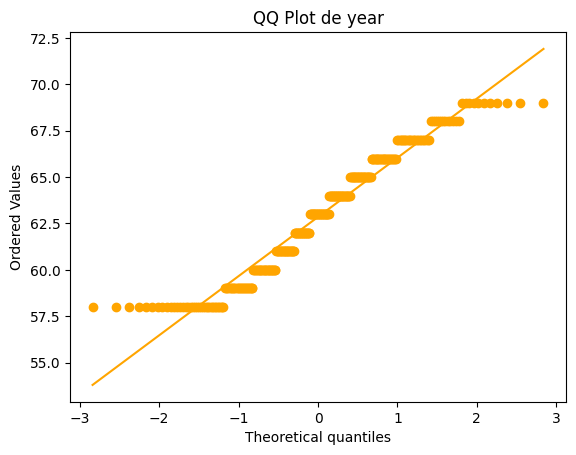

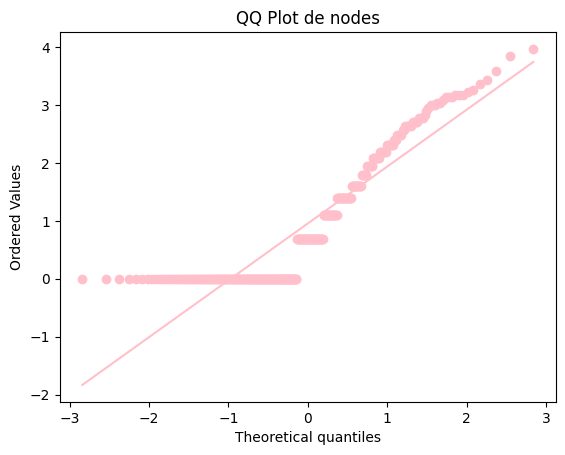

In [141]:
from scipy.stats import probplot
numeric_columns = df.select_dtypes(include=[np.number]).columns

colors = [ 'purple', 'orange','pink']

for i, col in enumerate(numeric_columns):
    plt.figure()
    probplot(df[col], dist='norm', plot=plt)
    plt.title(f'QQ Plot de {col}')

    ax = plt.gca()
    lines = ax.get_lines()
    for j, line in enumerate(lines):
        line.set_color(colors[i % len(colors)])
    plt.show()